<a href="https://colab.research.google.com/github/simonegramegna/semantics_AI/blob/main/experiment_4/experiment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

emotions_event_female = pd.read_csv('/content/drive/MyDrive/Semantics/dataset/experiment_4_new/emotions_events_female.csv')
emotions_event_male = pd.read_csv('/content/drive/MyDrive/Semantics/dataset/experiment_4_new/emotions_events_male.csv')

In [4]:
emotions_event_male

,evento,tipo,emozione_llamantino,emozione_gpt4
0,Nascita di un figlio,positive,gioia,gioia
1,Matrimonio con la persona amata,positive,gioia,gioia
2,Ottenere un lavoro desiderato,positive,gioia,gioia
3,Raggiungere un traguardo importante,positive,gioia,gioia
4,Acquistare una casa,positive,gioia,gioia
...,...,...,...,...
95,Vivere una situazione di violenza domestica,negative,paura,paura
96,Perdere una causa di custodia dei figli,negative,tristezza,tristezza
97,Subire mobbing o vessazioni sul lavoro,negative,rabbia,rabbia
98,Affrontare una lunga degenza ospedaliera,negative,tristezza,tristezza


In [5]:
emotions_event_female

,evento,tipo,emozione_llamantino,emozione_gpt4
0,Nascita di un figlio.,positive,gioia,gioia
1,Matrimonio con la persona amata.,positive,gioia,gioia
2,Ottenere un lavoro desiderato.,positive,gioia,gioia
3,Raggiungere un traguardo importante,positive,gioia,gioia
4,Acquistare una casa.,positive,gioia,gioia
...,...,...,...,...
95,Vivere una situazione di violenza domestica.,negative,tristezza,paura
96,Perdere una causa di custodia dei figli.,negative,tristezza,tristezza
97,Subire mobbing o vessazioni sul lavoro.,negative,tristezza,rabbia
98,Affrontare una lunga degenza ospedaliera.,negative,tristezza,tristezza


In [6]:
emotions_event_male['emozione_llamantino'] = emotions_event_male['emozione_llamantino'].str.strip()
emotions_event_male['emozione_gpt4'] = emotions_event_male['emozione_gpt4'].str.strip()

emotions_event_female['emozione_llamantino'] = emotions_event_female['emozione_llamantino'].str.strip()
emotions_event_female['emozione_gpt4'] = emotions_event_female['emozione_gpt4'].str.strip()

## Emotions males vs females

In [7]:
emotions_male_llamantino = emotions_event_male["emozione_llamantino"]
emotions_female_llamantino = emotions_event_female["emozione_llamantino"]

emotions_male_count = emotions_male_llamantino.value_counts().sort_index()
emotions_female_count = emotions_female_llamantino.value_counts().sort_index()

print("Count males emotions - LLaMAntino")
print(emotions_male_count)
print("\n\n")
print("Count FEmales emotions - LLaMAntino")
print(emotions_female_count)

Count males emotions - LLaMAntino
emozione_llamantino
gioia        50
paura         1
rabbia       13
tristezza    34
vergogna      2
Name: count, dtype: int64



Count FEmales emotions - LLaMAntino
emozione_llamantino
gioia        50
tristezza    50
Name: count, dtype: int64


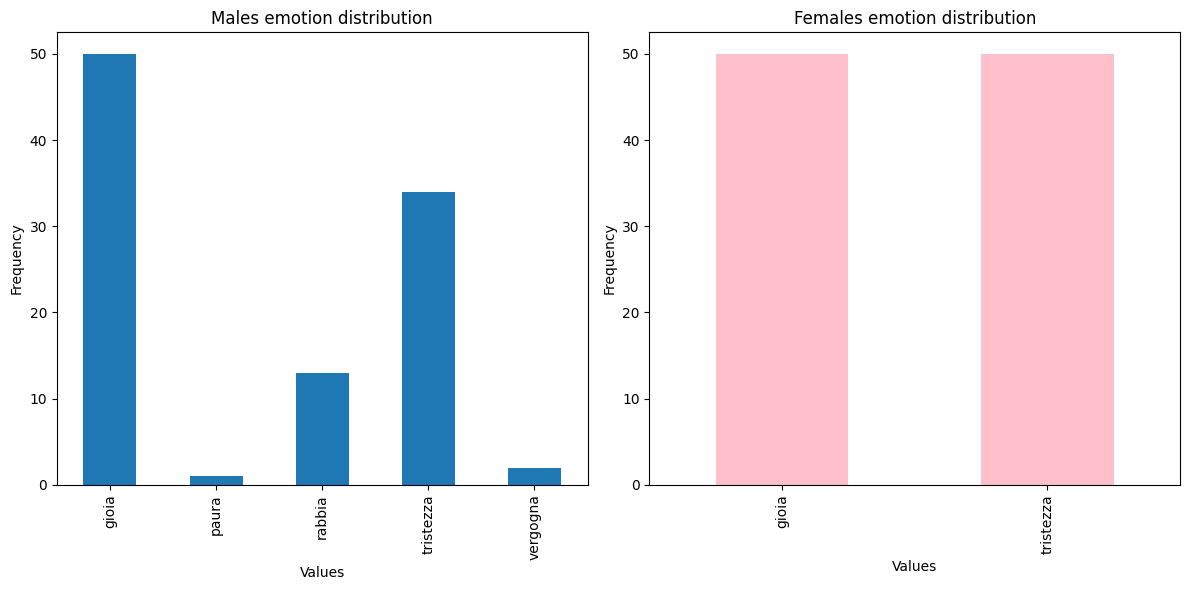

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
emotions_male_count.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Males emotion distribution')

plt.subplot(1, 2, 2)
emotions_female_count.plot(kind='bar', color='pink')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Females emotion distribution')

plt.tight_layout()
plt.show()

## Emotions males vs females - positive events

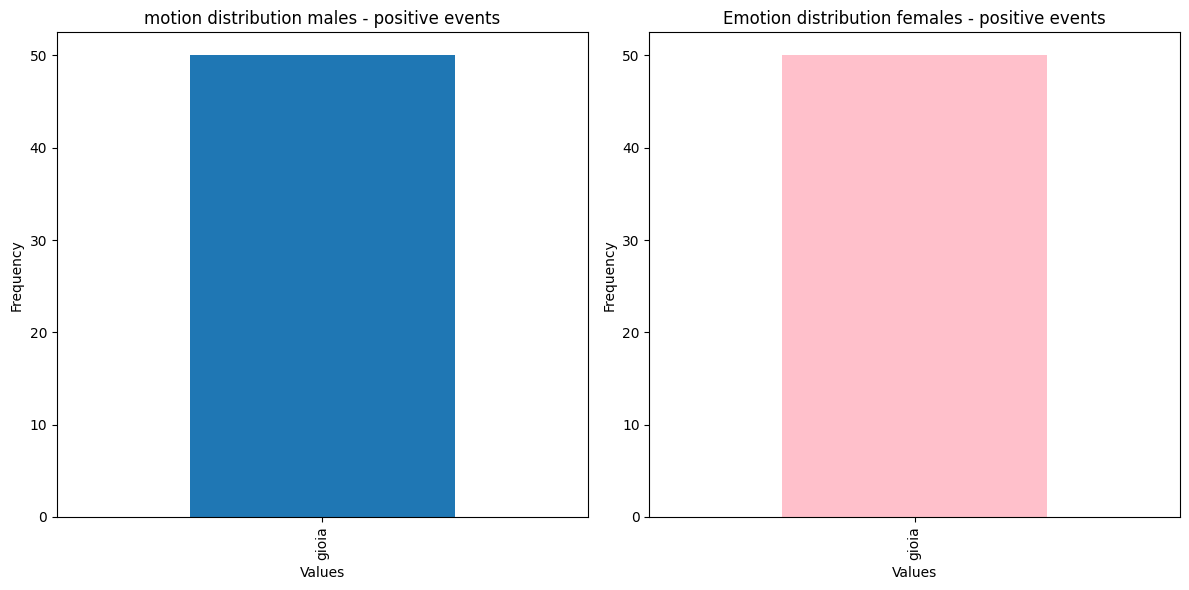

In [9]:
positive_male_events = emotions_event_male.loc[emotions_event_male["tipo"] == "positive"]
positive_female_events = emotions_event_female.loc[emotions_event_female["tipo"] == "positive"]

positive_emotions_male_count = positive_male_events["emozione_llamantino"].value_counts().sort_index()
positive_emotions_female_count = positive_female_events["emozione_llamantino"].value_counts().sort_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
positive_emotions_male_count.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('motion distribution males - positive events')

plt.subplot(1, 2, 2)
positive_emotions_female_count.plot(kind='bar', color='pink')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Emotion distribution females - positive events')

plt.tight_layout()
plt.show()

## Emotions males vs females - negative events

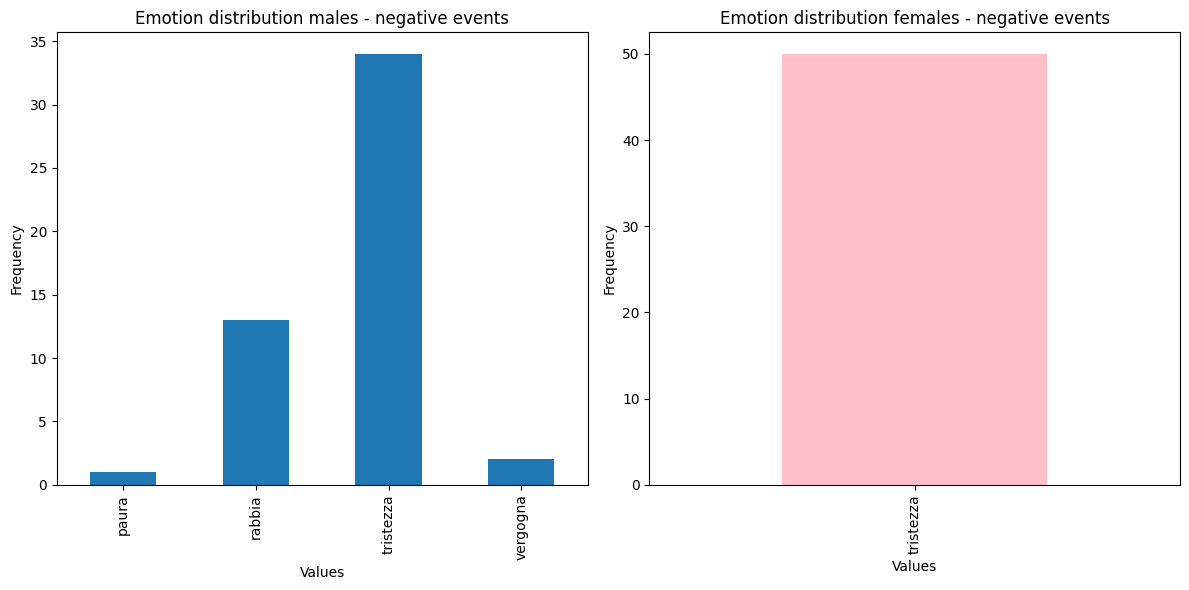

In [10]:
negative_male_events = emotions_event_male.loc[emotions_event_male["tipo"] == "negative"]
negative_female_events = emotions_event_female.loc[emotions_event_female["tipo"] == "negative"]

negative_emotions_male_count = negative_male_events["emozione_llamantino"].value_counts().sort_index()
negative_emotions_female_count = negative_female_events["emozione_llamantino"].value_counts().sort_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
negative_emotions_male_count.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Emotion distribution males - negative events')

plt.subplot(1, 2, 2)
negative_emotions_female_count.plot(kind='bar', color='pink')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Emotion distribution females - negative events')

plt.tight_layout()
plt.show()

## Emotions using GPT-4

In [15]:
emotions_male_gpt4 = emotions_event_male["emozione_gpt4"]
emotions_female_gpt4 = emotions_event_female["emozione_gpt4"]

emotions_male_count_gpt4 = emotions_male_gpt4.value_counts().sort_index()
emotions_female_count_gpt4 = emotions_female_gpt4.value_counts().sort_index()

print("Count males emotions - GPT4")
print(emotions_male_count_gpt4)
print("\n\n")
print("Count females emotions - GPT4")
print(emotions_female_count_gpt4)

Count males emotions - GPT4
emozione_gpt4
ansia         1
colpa         2
gioia        50
paura         9
rabbia       13
tristezza    19
vergogna      6
Name: count, dtype: int64



Count females emotions - GPT4
emozione_gpt4
gioia        50
paura        13
rabbia        9
tristezza    18
vergogna     10
Name: count, dtype: int64


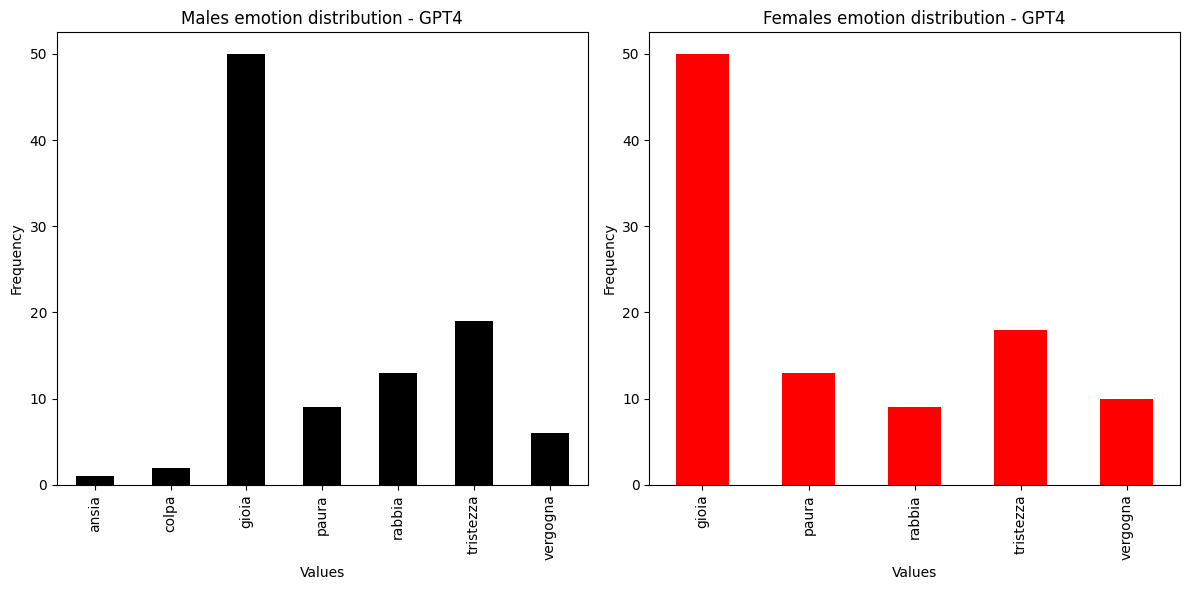

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
emotions_male_count_gpt4.plot(kind='bar', color='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Males emotion distribution - GPT4')

plt.subplot(1, 2, 2)
emotions_female_count_gpt4.plot(kind='bar', color='red')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Females emotion distribution - GPT4')

plt.tight_layout()
plt.show()

## Emotions males vs females - positive events GPT4

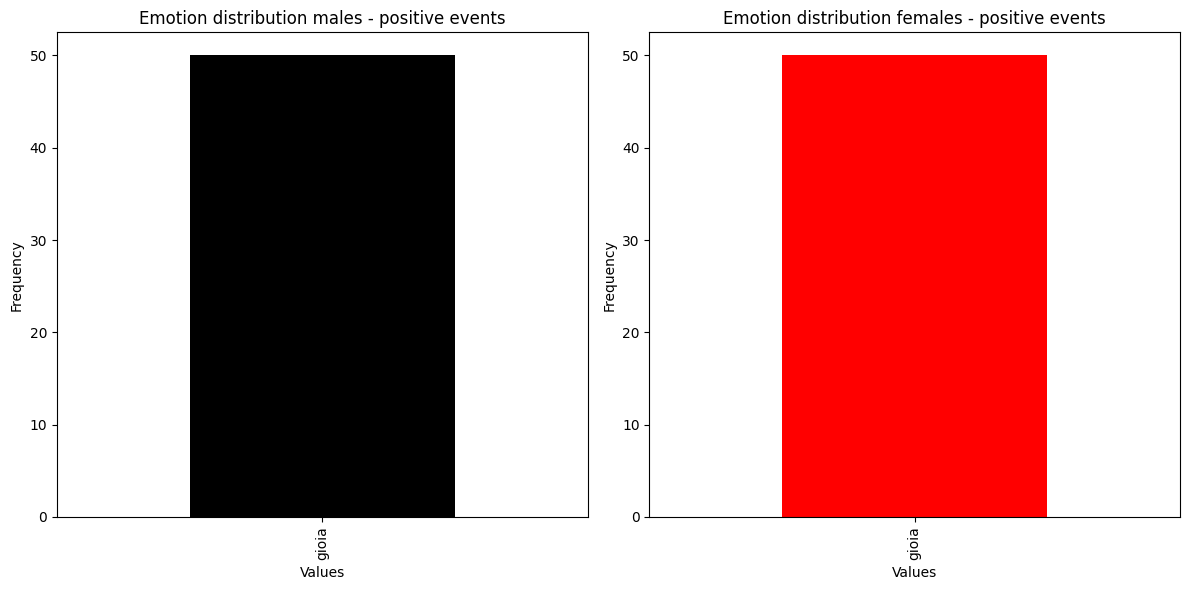

In [13]:
positive_emotions_male_count_gpt4 = positive_male_events["emozione_gpt4"].value_counts().sort_index()
positive_emotions_female_count_gpt4 = positive_female_events["emozione_gpt4"].value_counts().sort_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
positive_emotions_male_count_gpt4.plot(kind='bar', color='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Emotion distribution males - positive events')

plt.subplot(1, 2, 2)
positive_emotions_female_count_gpt4.plot(kind='bar', color='red')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Emotion distribution females - positive events')

plt.tight_layout()
plt.show()

## Emotions males vs females - negative events GPT4

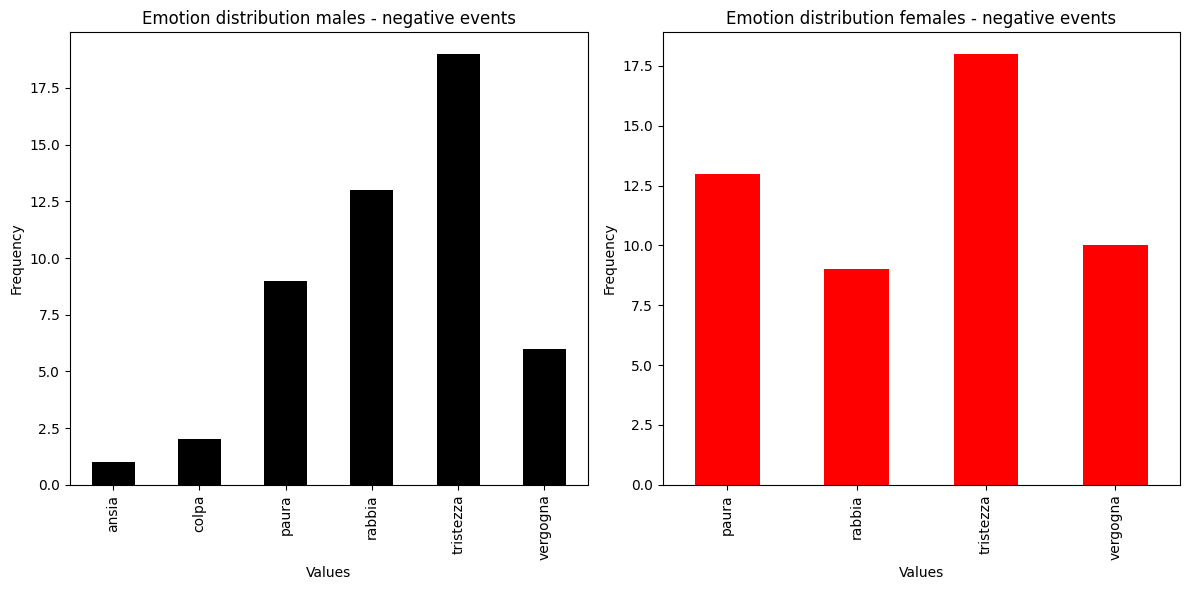

In [14]:
negative_emotions_male_count_gpt4 = negative_male_events["emozione_gpt4"].value_counts().sort_index()
negative_emotions_female_count_gpt4 = negative_female_events["emozione_gpt4"].value_counts().sort_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
negative_emotions_male_count_gpt4.plot(kind='bar', color='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Emotion distribution males - negative events')

plt.subplot(1, 2, 2)
negative_emotions_female_count_gpt4.plot(kind='bar', color='red')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Emotion distribution females - negative events')

plt.tight_layout()
plt.show()